# "Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation" in Graphlab Create

Please refer to the file linked below for background information about the problem
https://github.com/combient/tedsds/blob/master/juputer/Damage%20Propagation%20Modeling%20for%20Aircraft%20Engine%20Run-to-Failure%20Simulation.ipynb


### Initialize Graphlab Create

In [1]:
import graphlab as gl

### Import the data

Import all the data directly from NASA's original files into SFrames, Graphlab's native datastructure. 

In [2]:
train_data=gl.SFrame.read_csv('../data/train_FD001.txt.gz',delimiter=' ' ,header=False)
train_data.append(gl.SFrame.read_csv('../data/train_FD002.txt.gz',delimiter=' ' ,header=False))
train_data.append(gl.SFrame.read_csv('../data/train_FD003.txt.gz',delimiter=' ' ,header=False))
train_data.append(gl.SFrame.read_csv('../data/train_FD004.txt.gz',delimiter=' ' ,header=False))
                  
test_data=gl.SFrame.read_csv('../data/test_FD001.txt.gz',delimiter=' ' ,header=False)
test_data.append(gl.SFrame.read_csv('../data/test_FD002.txt.gz',delimiter=' ' ,header=False))
test_data.append(gl.SFrame.read_csv('../data/test_FD003.txt.gz',delimiter=' ' ,header=False))
test_data.append(gl.SFrame.read_csv('../data/test_FD004.txt.gz',delimiter=' ' ,header=False))

Truth=gl.SFrame.read_csv('../data/RUL_FD001.txt.gz',delimiter=' ' ,header=False)
Truth.append(gl.SFrame.read_csv('../data/RUL_FD002.txt.gz',delimiter=' ' ,header=False))
Truth.append(gl.SFrame.read_csv('../data/RUL_FD003.txt.gz',delimiter=' ' ,header=False))
Truth.append(gl.SFrame.read_csv('../data/RUL_FD004.txt.gz',delimiter=' ' ,header=False))

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1492749903.log


This non-commercial license of GraphLab Create for academic use is assigned to crazyacking@qq.com and will expire on April 20, 2018.


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/train_FD001.txt.gz

Parsing completed. Parsed 100 lines in 0.108761 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/train_FD001.txt.gz

Parsing completed. Parsed 20631 lines in 0.109639 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/train_FD002.txt.gz

Parsing completed. Parsed 100 lines in 0.227699 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/train_FD002.txt.gz

Parsing completed. Parsed 53759 lines in 0.374065 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/train_FD003.txt.gz

Parsing completed. Parsed 100 lines in 0.109507 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/train_FD003.txt.gz

Parsing completed. Parsed 24720 lines in 0.1286 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/train_FD004.txt.gz

Parsing completed. Parsed 100 lines in 0.25433 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/train_FD004.txt.gz

Parsing completed. Parsed 61249 lines in 0.363417 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/test_FD001.txt.gz

Parsing completed. Parsed 100 lines in 0.067236 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/test_FD001.txt.gz

Parsing completed. Parsed 13096 lines in 0.083066 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/test_FD002.txt.gz

Parsing completed. Parsed 100 lines in 0.136567 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/test_FD002.txt.gz

Parsing completed. Parsed 33991 lines in 0.212489 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/test_FD003.txt.gz

Parsing completed. Parsed 100 lines in 0.092307 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/test_FD003.txt.gz

Parsing completed. Parsed 16596 lines in 0.103246 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/test_FD004.txt.gz

Parsing completed. Parsed 100 lines in 0.169895 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/test_FD004.txt.gz

Parsing completed. Parsed 41214 lines in 0.31082 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/RUL_FD001.txt.gz

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Parsing completed. Parsed 100 lines in 0.01307 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/RUL_FD001.txt.gz

Parsing completed. Parsed 100 lines in 0.009714 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/RUL_FD002.txt.gz

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Parsing completed. Parsed 100 lines in 0.009869 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/RUL_FD002.txt.gz

Parsing completed. Parsed 259 lines in 0.010083 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/RUL_FD003.txt.gz

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Parsing completed. Parsed 100 lines in 0.008164 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/RUL_FD003.txt.gz

Parsing completed. Parsed 100 lines in 0.008904 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/RUL_FD004.txt.gz

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Parsing completed. Parsed 100 lines in 0.008175 secs.

Finished parsing file /mnt/hgfs/code-fantasy/ted-in-spark/data/RUL_FD004.txt.gz

Parsing completed. Parsed 248 lines in 0.009212 secs.

X1
112
98
69
82
91
93
91
95
111
96


### Rename the columns of the SFrames

This particular data files contains no header with column names. We thus need to rename the columns (= define the schema) manually. 
Renaming columns in SFrame in done by supplying a python dictionairy with 'Old name':'New name' to the SFrame.rename() method. 


In [3]:
Truth.rename({'X1':'RUL_maxcycle'})   #Rename the only column in the Truth file for test data

#Build the python dictionary
col_renaming_dict={'X1':'id' , 'X2':'cycle'}  
col_renaming_dict.update({'X3':'setting1' , 'X4':'setting2', 'X5':'setting3'})
for i in xrange(1,22):
    #Generates names for columns s1, s2,..., s21
    col_renaming_dict.update({'X'+str(i+5) : 's'+str(i)}) 

#Rename the column in test and data
train_data.rename(col_renaming_dict)
test_data.rename(col_renaming_dict)

#View the train data
train_data.head()

id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8
1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.7,1400.6,14.62,21.61,554.36,2388.06
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04
1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.2,14.62,21.61,554.26,2388.08
1,4,0.0007,0.0,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11
1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.0,2388.06
1,6,-0.0043,-0.0001,100.0,518.67,642.1,1584.47,1398.37,14.62,21.61,554.67,2388.02
1,7,0.001,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,21.61,554.34,2388.02
1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,21.61,553.85,2388.0
1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.8,14.62,21.61,553.69,2388.05
1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,21.61,553.59,2388.05


In [4]:
#View the test data
test_data.head()

id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8
1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.9,2388.04
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01
1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05
1,4,0.0042,0.0,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03
1,5,0.0014,0.0,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01
1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,21.61,554.22,2388.0
1,7,-0.0,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,21.61,553.89,2388.05
1,8,0.0006,-0.0,100.0,518.67,642.54,1580.89,1400.89,14.62,21.61,553.59,2388.05
1,9,-0.0036,0.0,100.0,518.67,641.88,1593.29,1412.28,14.62,21.61,554.49,2388.06
1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,21.61,554.28,2388.04


### Calculate the remaining useful life (RUL) for the training data.

In the training data, engines were run until failure, corresponding to the last cycle for each engine ID. 

To calculte the RUL for each engine and cycke, we need to : 
    1) Find the last cycle before failure for each engine (i.e. the cycle with maximum value)
    2) For each cycle, calculate the RUL = last cycle - current cycle

In [5]:
fault_cycle=train_data.groupby('id',operations={'Fault_cycle' : gl.aggregate.MAX('cycle')})   #Find the last cycle
train_data=train_data.join(fault_cycle) #Add it as a new column to the SFrame
train_data['RUL']=train_data.apply(lambda x: x['Fault_cycle']-x['cycle'])  #Calculate the RUL
#train_data.remove_column('Fault_cycle')  #Optionally remove the column since it won't be needed further
train_data.head() #View the data



id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8
1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.7,1400.6,14.62,21.61,554.36,2388.06
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04
1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.2,14.62,21.61,554.26,2388.08
1,4,0.0007,0.0,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11
1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.0,2388.06
1,6,-0.0043,-0.0001,100.0,518.67,642.1,1584.47,1398.37,14.62,21.61,554.67,2388.02
1,7,0.001,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,21.61,554.34,2388.02
1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,21.61,553.85,2388.0
1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.8,14.62,21.61,553.69,2388.05
1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,21.61,553.59,2388.05


### Convert the test data to the same format as train data

For the test data, the truth tell us the RUL for each engine after the last run of each engine in the test data.

We transform this information in order to obtain a column for RUL for each engine at each cycle.  



In [6]:

Truth['id']=range(1,len(Truth)+1)  #Re-create the engine ID for the data from the "Truth" file. 
test_data=test_data.join(Truth)    #Add this data as a new column to the SFrame

last_test_cycle=test_data.groupby('id',operations={'Last_test_cycle' : gl.aggregate.MAX('cycle')}) #Find the last test cycle for each engine
test_data=test_data.join(last_test_cycle) #Add this as a new column to the SFrame

#The RUL at each cycle is the RUL at the end of the test + how many cycles before end of the test.
test_data['RUL']=test_data.apply(lambda x: x['RUL_maxcycle']+(x['Last_test_cycle']-x['cycle']))

#Optionally remove unnessary columns                                
#test_data.remove_column('RUL_maxcycle')
#test_data.remove_column('Last_test_cycle')

test_data.head() #View the data 


id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8
1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.9,2388.04
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01
1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05
1,4,0.0042,0.0,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03
1,5,0.0014,0.0,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01
1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,21.61,554.22,2388.0
1,7,-0.0,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,21.61,553.89,2388.05
1,8,0.0006,-0.0,100.0,518.67,642.54,1580.89,1400.89,14.62,21.61,553.59,2388.05
1,9,-0.0036,0.0,100.0,518.67,641.88,1593.29,1412.28,14.62,21.61,554.49,2388.06
1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,21.61,554.28,2388.04


### Creating the labels 

We now create two labels for the data based on the RUL. 
Label 1 is 0 if RUL >30 (far from failure) and 1 otherwise (close to failure).
Label 2 is similar but add a third category '2' when  the RUL < 15 (very close to failure). 

We apply this labelling to both the training and test data.



In [7]:
w1=30
w0=15

train_data['label1']=train_data.apply(lambda x: 0 if x['RUL']>w1 else 1)
train_data['label2']=train_data.apply(lambda x: x['label1'] if x['RUL']>w0 else 2)
test_data['label1']=test_data.apply(lambda x: 0 if x['RUL']>w1 else 1)
test_data['label2']=test_data.apply(lambda x: x['label1'] if x['RUL']>w0 else 2)   


### Feature engineering

In here, we will computing the mean and standard deviation (std) of each variable over the last 5 cycles and use these new quantities as supplementary features for our machine learning algorithms. 



In [8]:
def build_features(data):
    #Defining the Windows onto which we perform the mean and std.
    #Here, the average and std at cycle i will be calculate based on data from cycle i-4 to i. 
    windowsStart = -4
    windowsStop = 0

    #Define the columns for which we want to calculate the mean and std
    cols=list()
    for i in xrange(1,22):
        cols.append('s'+str(i)) 
    col_id_cycle=cols
    col_id_cycle.append('id')
    col_id_cycle.append('cycle')
    
    #Find a list of engine ID
    IDs=data['id'].unique()
    
    CollectFrame=gl.SFrame() # A temporary SFrame for storing temporary data
    for IDx in IDs:  #For each engine
        tmpFrame=data[data['id']==IDx][col_id_cycle].sort('cycle', ascending = True)  #Select all the cycles and sort by cycle ID
        for col in cols:  #Calculate the mean and std for every column of interest
            tmpFrame['mean_'+col]=tmpFrame[col].rolling_mean(windowsStart,windowsStop)
            tmpFrame['stdv_'+col]=tmpFrame[col].rolling_stdv(windowsStart,windowsStop)   
        CollectFrame=CollectFrame.append(tmpFrame)  #Add the new features to the SFrame
    data=data.join(CollectFrame) #When everything has been computed for all engine IDs, join back to the original SFrame. 
    #NB: there might be a more elegant way of doing the above - come back later!
    
    
    #The mean and std, are not defined for the first 4 cycles of each engine. 
    for col in cols:
        #These lines fill the missing data with some reasonable values. 
        data['mean_'+col]=data[{col , 'mean_'+col , 'stdv_'+col}].apply(lambda x :  x[col] if x['mean_'+col] is None  else  x['mean_'+col])    
        data['stdv_'+col]=data[{col , 'mean_'+col , 'stdv_'+col}].apply(lambda x :  0 if x['stdv_'+col] is None  else  x['stdv_'+col])

    return data

In [9]:
#Create the features for the training and test datasets (this can take a while to run)
train_data=build_features(train_data)
test_data=build_features(test_data)

In [12]:
#View the data in 2 different ways
train_data.show() 
train_data.head()

Canvas is updated and available in a tab in the default browser.


id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8
49,1,0.0019,0.0002,100.0,518.67,642.31,1595.57,1401.2,14.62,21.61,553.33,2388.12
49,2,-0.0023,0.0001,100.0,518.67,642.37,1583.9,1400.51,14.62,21.61,553.25,2388.1
49,3,-0.0014,0.0002,100.0,518.67,643.07,1588.82,1408.52,14.62,21.61,553.36,2388.14
49,4,0.0014,-0.0004,100.0,518.67,642.74,1589.17,1410.89,14.62,21.61,553.59,2388.13
49,5,-0.0018,0.0004,100.0,518.67,642.67,1597.75,1406.88,14.62,21.61,553.22,2388.06
49,6,-0.0052,-0.0003,100.0,518.67,642.48,1591.5,1406.92,14.62,21.61,553.69,2388.14
49,7,0.0024,-0.0002,100.0,518.67,642.79,1586.42,1403.15,14.62,21.61,553.81,2388.04
49,8,0.0032,0.0002,100.0,518.67,642.84,1583.72,1402.64,14.62,21.61,553.39,2388.14
49,9,-0.001,0.0001,100.0,518.67,642.54,1589.21,1408.57,14.62,21.61,553.43,2388.13
49,10,0.0001,0.0001,100.0,518.67,642.1,1582.51,1402.66,14.62,21.61,553.28,2388.08


### Create a list of features that will be used for training

In [13]:
features_to_train=list()
features_to_train.append('cycle')
for i in xrange(1,3):
    features_to_train.append( 'setting'+str(i) )
for i in xrange(1,22):
    features_to_train.append('s'+str(i)) 
    features_to_train.append('mean_s'+str(i))
    features_to_train.append('stdv_s'+str(i))

### Train a logistic classifier (with default parameters) that predicts label2 based on the list of features defined above

In [14]:
model=gl.logistic_classifier.create(train_data,'label2',features_to_train,class_weights='auto')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 's1', 'mean_s1', 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 's16', 'mean_s16', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 19671

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 134

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 1.628611     | 0.863301          | 0.866667            |

| 2         | 3        | 2.033410     | 0.823446          | 0.825000            |

| 3         | 4        | 2.371398     | 0.814854          | 0.812500            |

| 4         | 5        | 2.704576     | 0.813533          | 0.807292            |

| 5         | 6        | 3.012764     | 0.813482          | 0.806250            |

| 6         | 7        | 3.303572     | 0.813482          | 0.806250            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

### Evaluate the model on the training and test data using Graphab's built in tool

In [15]:
model.evaluate(train_data)

{'accuracy': 0.8131452668314673,
 'auc': 0.9286347393485093,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 9
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      2       |        1        |  159  |
 |      1       |        1        |  982  |
 |      1       |        2        |  328  |
 |      1       |        0        |  190  |
 |      0       |        0        | 14364 |
 |      2       |        2        |  1430 |
 |      0       |        1        |  3124 |
 |      2       |        0        |   11  |
 |      0       |        2        |   43  |
 +--------------+-----------------+-------+
 [9 rows x 3 columns],
 'f1_score': 0.6922234800563559,
 'log_loss': 0.47097291905437016,
 'precision': 0.6701497718090743,
 'recall': 0.7892550830592157,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 	class	int
 
 Rows: 300003


### Evaluate and vizualize confusion matrices 

In [16]:
model.evaluate(test_data)

{'accuracy': 0.9159285277947465,
 'auc': 0.9583808727328692,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 8
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      2       |        1        |   12  |
 |      1       |        1        |  181  |
 |      0       |        2        |   6   |
 |      1       |        0        |   51  |
 |      1       |        2        |   40  |
 |      0       |        1        |  992  |
 |      2       |        2        |   48  |
 |      0       |        0        | 11766 |
 +--------------+-----------------+-------+
 [8 rows x 3 columns],
 'f1_score': 0.6097190391196645,
 'log_loss': 0.2458626916600288,
 'precision': 0.5530216992363638,
 'recall': 0.7957508402922434,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 	class	int
 
 Rows: 300003
 
 Data:
 +-----------+-----+-----+-------+--

### The next section simply defines a function to vizualize confusion matrices

In [25]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() 

def gl_confmatrix_2_confmatrix(sf,number_label=3):
    Nlabels=max(len(sf['target_label'].unique()),len(sf['predicted_label'].unique()))
    matrix=np.zeros([number_label,number_label],dtype=np.float)
    for i in sf:
        matrix[i['target_label'],i['predicted_label']]=i['count']
    sum
    
    row_sums = matrix.sum(axis=1) 
    matrix=matrix / row_sums[:, np.newaxis]
    matrix*=100
    
    plt.figure(figsize=(number_label, number_label))
    dims = (8,8)
    fig, ax = plt.subplots(figsize=dims)
    sns.heatmap(matrix, annot=True,  fmt='.2f', xticklabels=['0' ,'1','2'], yticklabels=['0' ,'1','2']);
    plt.title('Confusion Matrix');
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
    return matrix

array([[  9.21811344e+01,   7.77185835e+00,   4.70072078e-02],
       [  1.87500000e+01,   6.65441176e+01,   1.47058824e+01],
       [  0.00000000e+00,   2.00000000e+01,   8.00000000e+01]])

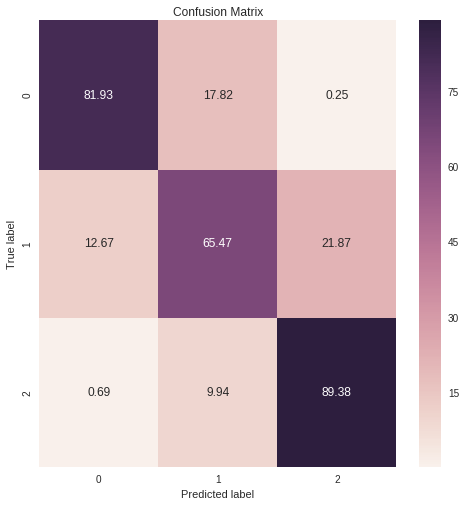

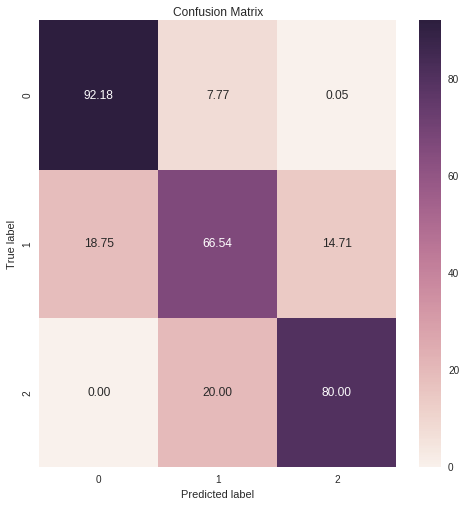

In [26]:
conf_matrix_train=gl.evaluation.confusion_matrix(train_data['label2'],model.predict(train_data))
conf_matrix_test=gl.evaluation.confusion_matrix(test_data['label2'],model.predict(test_data))
gl_confmatrix_2_confmatrix(conf_matrix_train)    
gl_confmatrix_2_confmatrix(conf_matrix_test)    

### View the coefficients and note that many have very small values.

In [27]:
model.coefficients.sort('value').show()

Canvas is updated and available in a tab in the default browser.


### The same for the two-states label1

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 'stdv_s1', 's5', 'mean_s5', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 19628

Number of classes           : 2

Number of feature columns   : 66

Number of unpacked features : 66

Number of coefficients    : 67

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.296842     | 0.920165          | 0.925224            |

| 2         | 3        | 0.445053     | 0.923171          | 0.928215            |

| 3         | 4        | 0.601607     | 0.922763          | 0.930209            |

| 4         | 5        | 0.755297     | 0.923069          | 0.928215            |

| 5         | 6        | 0.907178     | 0.923120          | 0.927218            |

| 6         | 7        | 1.129544     | 0.923120          | 0.927218            |

| 10        | 11       | 1.739161     | 0.923120          | 0.927218            |

+-----------+----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

array([[ 97.74365403,   2.25634597],
       [ 16.26506024,  83.73493976]])

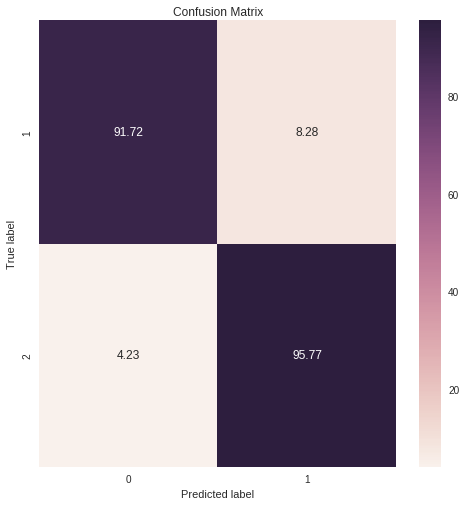

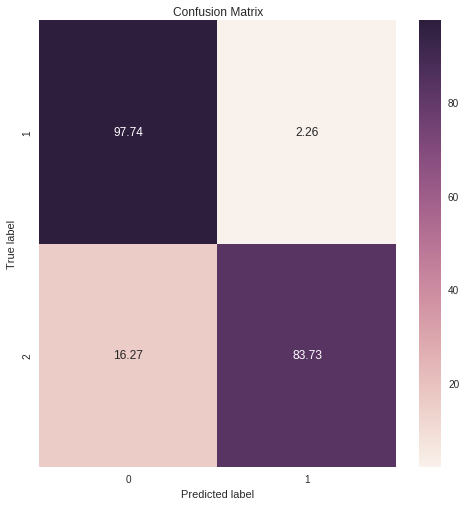

In [28]:
model=gl.logistic_classifier.create(train_data,'label1',features_to_train,class_weights='auto')
conf_matrix_train=gl.evaluation.confusion_matrix(train_data['label1'],model.predict(train_data))
conf_matrix_test=gl.evaluation.confusion_matrix(test_data['label1'],model.predict(test_data))
gl_confmatrix_2_confmatrix(conf_matrix_train,number_label=2)    
gl_confmatrix_2_confmatrix(conf_matrix_test,number_label=2)    

### We now try different types of classifiers

##### Random forest classifier

[WARNING] graphlab.toolkits.classifier.random_forest_classifier: The `num_trees` keyword argument is deprecated. Please use the `max_iterations` argument instead. Any value provided for `num_trees` will be used in place of `max_iterations`.


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 's1', 'mean_s1', 'stdv_s1', 'stdv_s5', 's10', 'mean_s10', 'stdv_s10', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Random forest classifier:

--------------------------------------------------------

Number of examples          : 19535

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.140089     | 0.901442          | 0.869219            | 0.408751          | 0.468015            |

| 2         | 0.243890     | 0.910437          | 0.868749            | 0.402532          | 0.445601            |

| 3         | 0.362051     | 0.909017          | 0.882431            | 0.397215          | 0.435784            |

| 4         | 0.489141     | 0.912843          | 0.912258            | 0.398249          | 0.435779            |

| 5         | 0.612293     | 0.910021          | 0.894956            | 0.398389          | 0.436922            |

| 6         | 0.741723     | 0.912454          | 0.904284            | 0.397563          | 0.435822            |

| 10        | 1.268520     | 0.915990          | 0.912992            | 0.393287          | 0.431361            |

| 11        | 1.415189     | 0.915048          | 0.916556            | 0.393009          | 0.430156            |

| 20        | 2.526982     | 0.915331          | 0.907904            | 0.394530          | 0.434006            |

| 30        | 3.775258     | 0.914847          | 0.895689            | 0.394958          | 0.438754            |

| 40        | 4.980269     | 0.915375          | 0.892069            | 0.394277          | 0.436837            |

| 50        | 6.185719     | 0.914507          | 0.892069            | 0.394431          | 0.437309            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

array([[ 97.03071138,   2.96928862,   0.        ],
       [ 11.39705882,  83.82352941,   4.77941176],
       [  0.        ,  46.66666667,  53.33333333]])

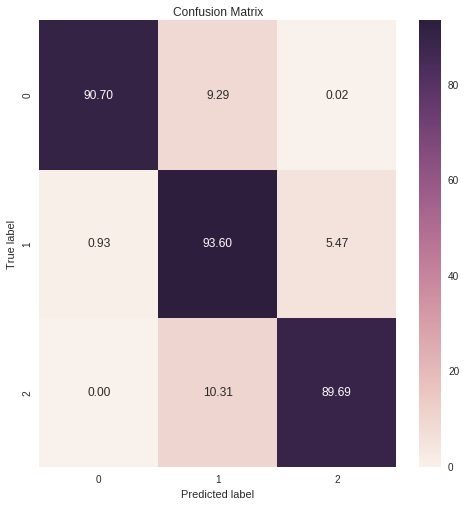

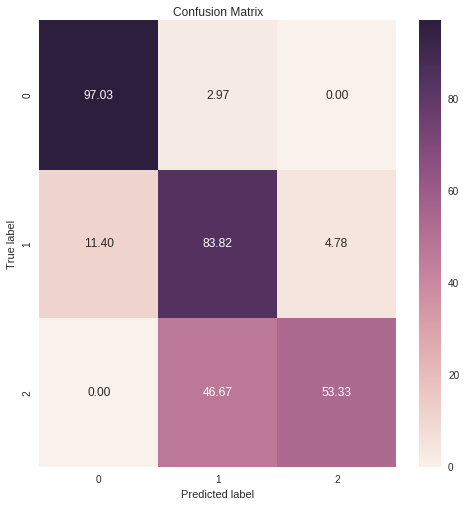

In [29]:
model=gl.random_forest_classifier.create(train_data,'label2',features_to_train,class_weights='auto',num_trees=50)
conf_matrix_train=gl.evaluation.confusion_matrix(train_data['label2'],model.predict(train_data))
conf_matrix_test=gl.evaluation.confusion_matrix(test_data['label2'],model.predict(test_data))
gl_confmatrix_2_confmatrix(conf_matrix_train)    
gl_confmatrix_2_confmatrix(conf_matrix_test) 

##### Boosted trees classifier

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 's1', 'mean_s1', 'stdv_s1', 's5', 'mean_s5', 'stdv_s5', 'stdv_s10', 'stdv_s16', 's18', 'mean_s18', 'stdv_s18', 's19', 'mean_s19', 'stdv_s19' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19602

Number of classes           : 3

Number of feature columns   : 66

Number of unpacked features : 66

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.146417     | 0.905463          | 0.883175            | 0.801496          | 0.813112            |

| 2         | 0.275401     | 0.919073          | 0.905125            | 0.620790          | 0.643503            |

| 3         | 0.408275     | 0.923968          | 0.904029            | 0.502729          | 0.531768            |

| 4         | 0.535521     | 0.928236          | 0.900033            | 0.419138          | 0.454197            |

| 5         | 0.670059     | 0.930638          | 0.900140            | 0.357819          | 0.397775            |

| 6         | 0.803503     | 0.933072          | 0.892979            | 0.311410          | 0.360258            |

| 10        | 1.361604     | 0.948614          | 0.903764            | 0.207223          | 0.266652            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

array([[ 97.75148856,   2.24851144,   0.        ],
       [ 15.80882353,  79.77941176,   4.41176471],
       [  0.        ,  43.33333333,  56.66666667]])

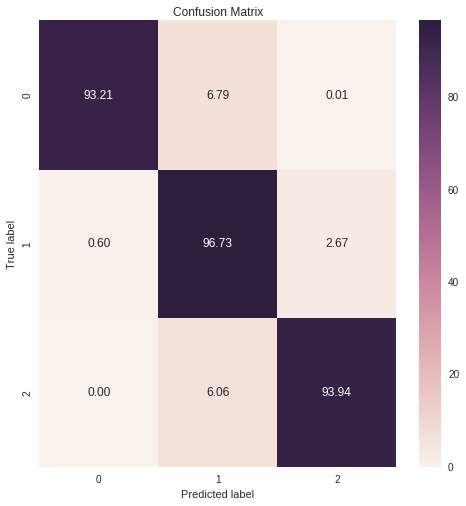

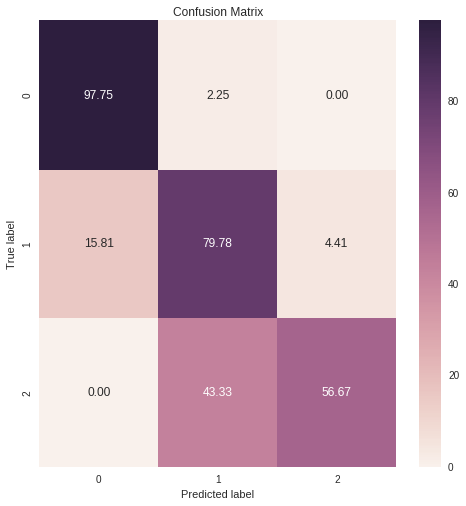

In [30]:
model=gl.boosted_trees_classifier.create(train_data,'label2',features_to_train,class_weights='auto')
conf_matrix_train=gl.evaluation.confusion_matrix(train_data['label2'],model.predict(train_data))
conf_matrix_test=gl.evaluation.confusion_matrix(test_data['label2'],model.predict(test_data))
gl_confmatrix_2_confmatrix(conf_matrix_train)    
gl_confmatrix_2_confmatrix(conf_matrix_test) 